<a href="https://colab.research.google.com/github/gustavoramos82/estimando-carros-usados/blob/main/Estimativa_dos_carros_usados_analise_univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimando valores de carros usados

Neste projeto será para aplicado um modelo de machine learnin para estimar valores de carros usados, para isso será usado um dataset no kaggle (que pode ser obtido [aqui](https://www.kaggle.com/datasets/sujay1844/used-car-prices?select=train.csv))

Em um primeiro momento, será feito uma análise exploratória, em um segundo momento será aplicado um modelo de machine learning com o objetivo de explorar modelos como SVM e Árvore de decisão e modelos baseados nele

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
carro_usado = pd.read_csv('train.csv')
carro_usado.drop('Unnamed: 0',axis=1,inplace=True)
carro_usado.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [3]:
carro_usado.shape

(5847, 13)

Temos um dataset de 13 colunas e 5847 linhas o que não é um dataset muito grande e que temos uma variavel taget que o preço do carro, abixo temo um dicionário dos dados para verificar como cada coluna se trata

### Dicionário dos dados

- **Name**: Marca e modelo do carro
- **Location**:Cidade em que o carro foi listado
- **Year**: Ano em que o carro foi produzido
- **Kilometers_Driven**: Total de quilômetros dirigidos
- **Fuel_Type**: Tipo de combustivel
- **Transmission**: Tipo de transmissão se é manual ou automático
- **Owner_Type**: Tipo do proprietário
- **Mileage**: Quilometragem padrão oferecida pela montadora em kmpl ou km/kg
- **Engine**: Volume de cilindrada do motor em CC
- **Power**: Numer de power da máquina
- **Seats**: Número de assentos no carro
- **Price**: Preço do carro em INR Lakhs (Rúpia indiana)
- **New_Price**: Preço de um carro novo de um mesmo modelo

In [4]:
carro_usado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5847 non-null   object 
 1   Location           5847 non-null   object 
 2   Year               5847 non-null   int64  
 3   Kilometers_Driven  5847 non-null   int64  
 4   Fuel_Type          5847 non-null   object 
 5   Transmission       5847 non-null   object 
 6   Owner_Type         5847 non-null   object 
 7   Mileage            5845 non-null   object 
 8   Engine             5811 non-null   object 
 9   Power              5811 non-null   object 
 10  Seats              5809 non-null   float64
 11  New_Price          815 non-null    object 
 12  Price              5847 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 594.0+ KB


<Axes: >

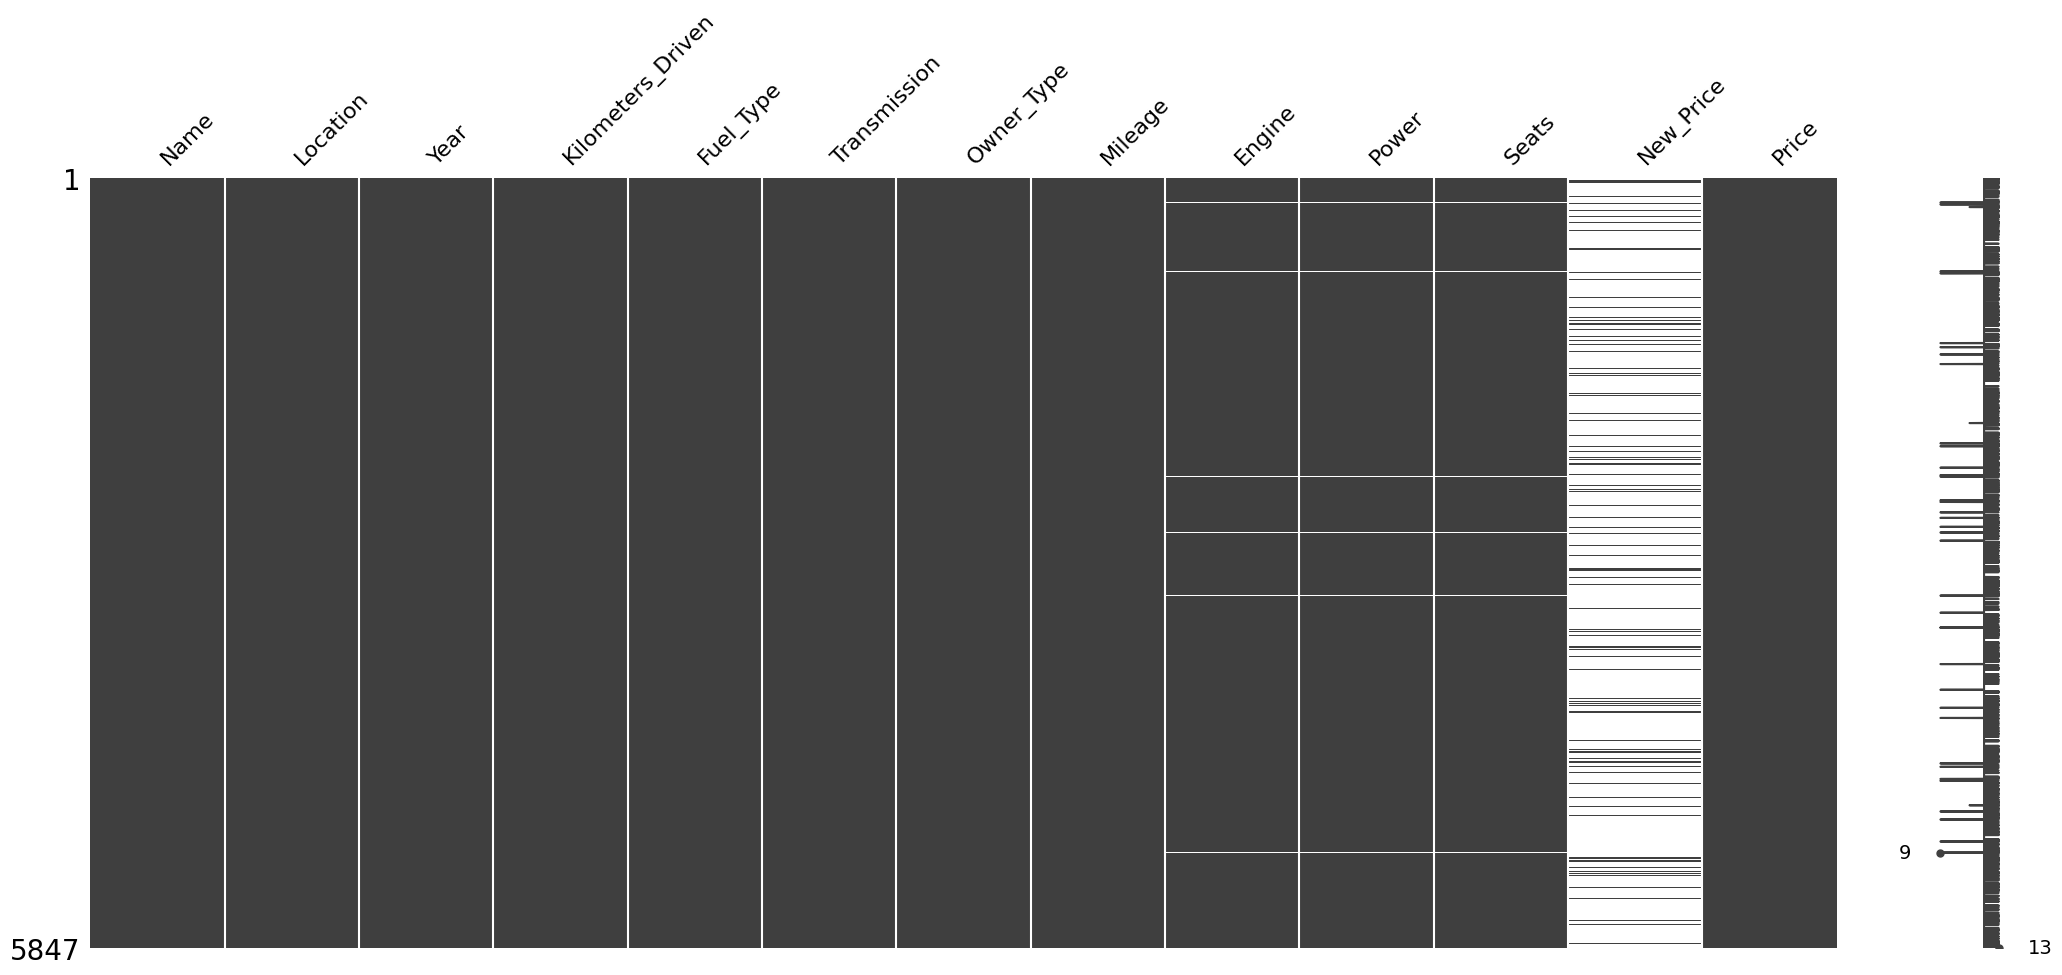

In [5]:
msno.matrix(carro_usado)

Podemos ver que as colunas new_price tem muitas linhas em branco, logo a msm não vai ser considerada para análise e posteriormente a modelagem.

Além disso, temos as colunas Seats, Power e Engine e Mileage tem alguns valores em branco, o que será trattado após feito a análise

In [6]:
# Excluindo a coluna new_price
carro_usado.drop('New_Price',axis=1,inplace=True)
carro_usado.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


In [7]:
# Apagando as palavras CC em engine power

carro_usado['Engine'] = carro_usado['Engine'].str.replace('CC','')
carro_usado['Engine'] = carro_usado['Engine'].astype(float)

carro_usado['Power'] = carro_usado['Power'].str.replace('bhp','')
carro_usado['Power'] = carro_usado['Power'].astype(float)

carro_usado.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199.0,88.70,5.0,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,3.50


Sobre eu não sei se Kmpl e km/kg são a mesma coisa eu ainda não irei fazer nenhuma formatação

In [8]:
carro_usado.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price
count,5847.000000,5.847000e+03,5811.000000,5811.000000,5809.000000,5847.000000
mean,2013.448435,5.841013e+04,1631.552573,113.803144,5.286452,9.653742
std,3.194949,9.237971e+04,601.972587,53.896719,0.806668,11.275966
min,1998.000000,1.710000e+02,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.346750e+04,1198.000000,78.000000,5.000000,3.550000
50%,2014.000000,5.257600e+04,1497.000000,98.600000,5.000000,5.750000
75%,2016.000000,7.249050e+04,1991.000000,139.010000,5.000000,10.250000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,160.000000


Por essa tabela de medidas-resumo podemos ver que não podemos pegar a média como referência, logo será utilizado no caso a mediana, com exceção da coluna assentos

In [9]:
def primeira_palavra(string): # Pegando a primeira palavra da coluna pois se refere a marca do carro
  words = string.split()
  return words[0]

In [10]:
marca = []
for i in carro_usado.Name:
  primeira = primeira_palavra(i)
  marca.append(primeira)


In [11]:
carro_usado['Marca'] = marca
carro_usado.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Marca
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199.0,88.70,5.0,4.50,Honda
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,3.50,Nissan


Text(0, 0.5, 'Quantidade')

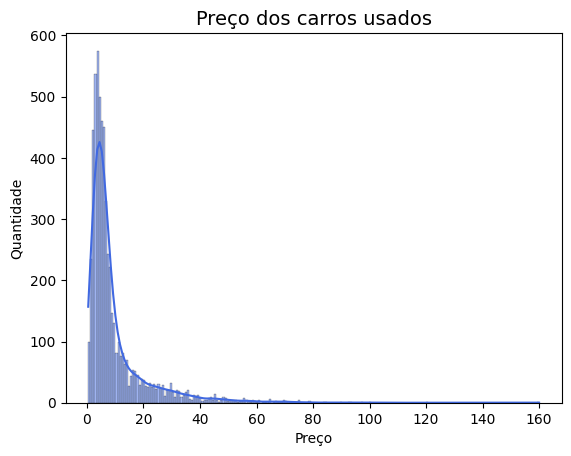

In [12]:
plt.title('Preço dos carros usados',fontsize=14)
sns.histplot(x='Price',data=carro_usado,color='royalblue',kde=True)
plt.xlabel('Preço')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Localização')

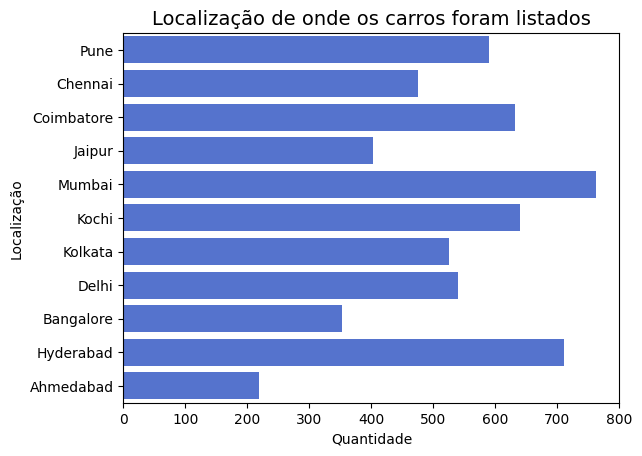

In [22]:
plt.title('Localização de onde os carros foram listados',
          fontsize=14)
sns.countplot(y='Location',data=carro_usado,color='royalblue')
plt.xlabel('Quantidade')
plt.ylabel('Localização')

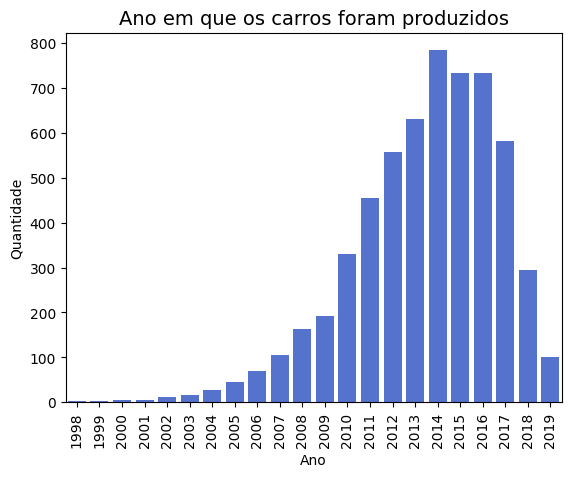

In [23]:
plt.title('Ano em que os carros foram produzidos',
          fontsize=14)
sns.countplot(x='Year',data=carro_usado,color='royalblue')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=90);

Text(0, 0.5, 'Quantidade')

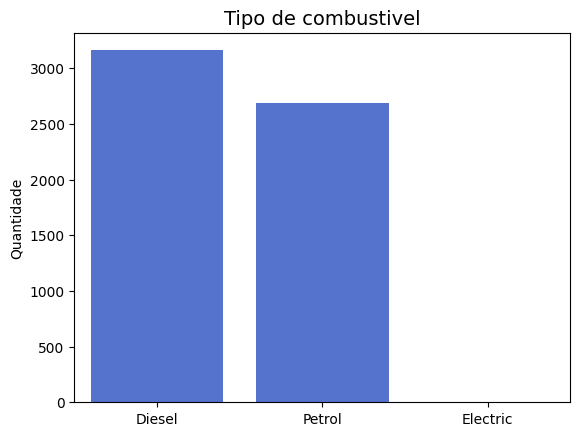

In [24]:
plt.title('Tipo de combustivel',fontsize=14)
sns.countplot(x='Fuel_Type',data=carro_usado,color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

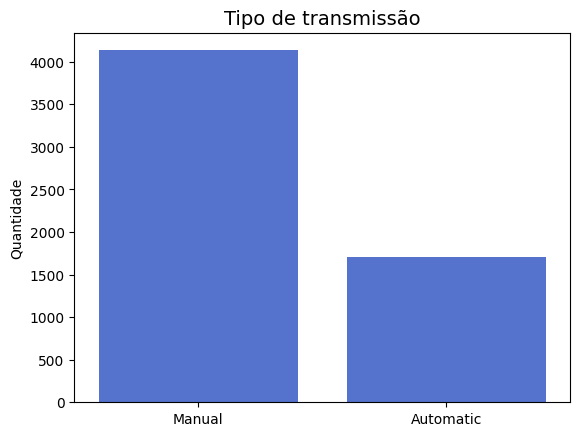

In [25]:
plt.title('Tipo de transmissão',fontsize=14)
sns.countplot(x='Transmission',data=carro_usado,color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

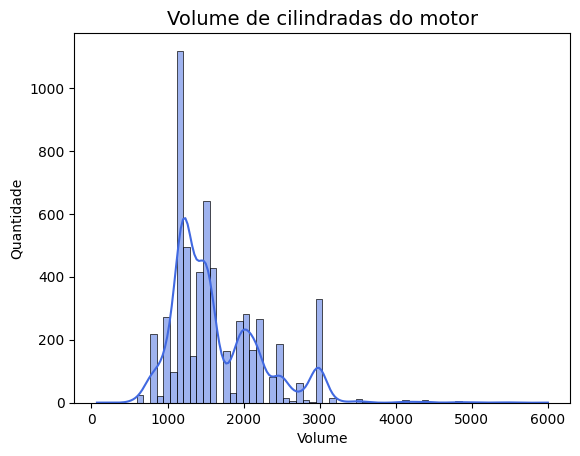

In [26]:
plt.title('Volume de cilindradas do motor',fontsize=14)
sns.histplot(x='Engine',data=carro_usado,color='royalblue',kde=True)
plt.xlabel('Volume')
plt.ylabel('Quantidade')

Text(0.5, 0, 'Quantidade')

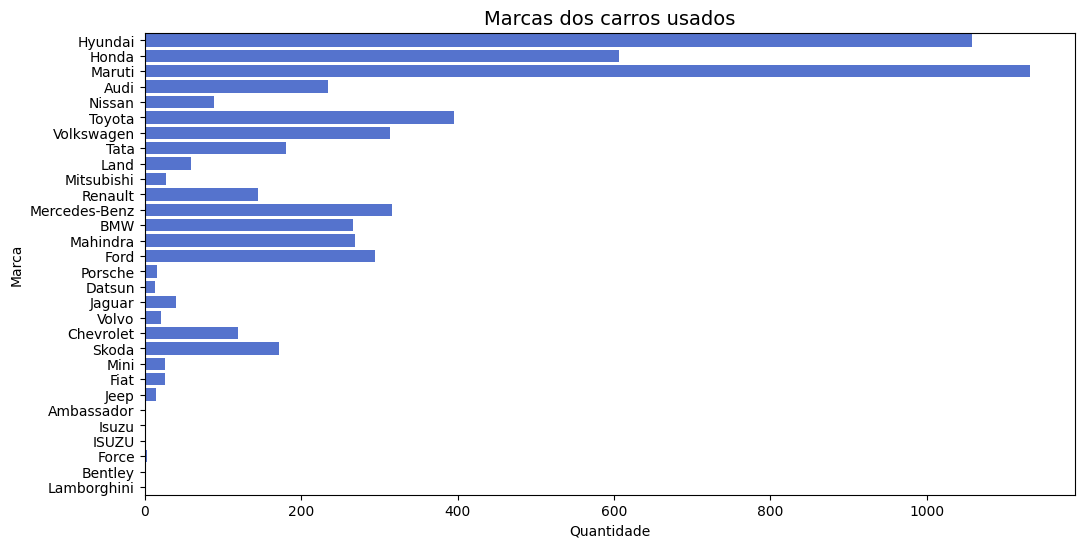

In [18]:
plt.figure(figsize=(12,6))
plt.title('Marcas dos carros usados',fontsize=14)
sns.countplot(y='Marca',data=carro_usado,color='royalblue')
plt.xlabel('Quantidade')


Text(0, 0.5, 'Quantidade')

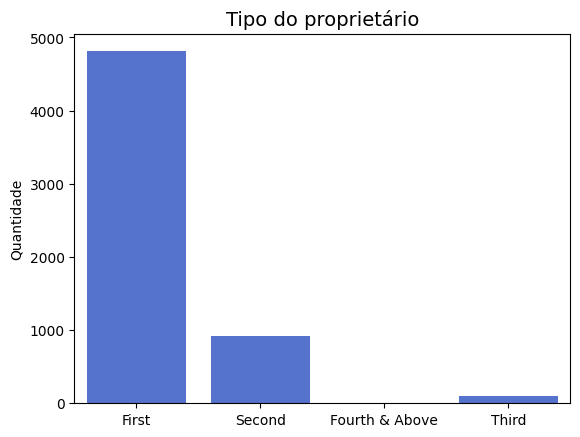

In [27]:
plt.title('Tipo do proprietário',fontsize=14)
sns.countplot(x='Owner_Type',data=carro_usado,color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

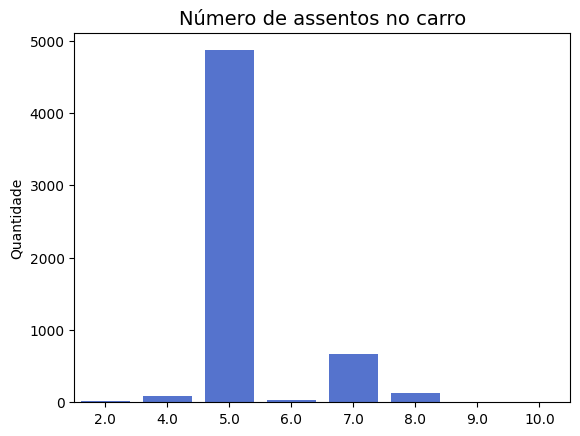

In [29]:
plt.title('Número de assentos no carro',fontsize=14)
sns.countplot(x='Seats',data=carro_usado,color='royalblue')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

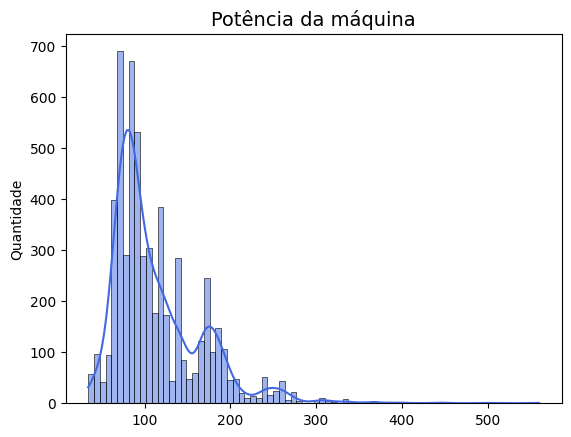

In [31]:
plt.title('Potência da máquina',fontsize=14)
sns.histplot(x='Power',data=carro_usado,color='royalblue',kde=True)
plt.xlabel('')
plt.ylabel('Quantidade')

In [37]:
carro_usado[carro_usado['Kilometers_Driven']<np.max(carro_usado['Kilometers_Driven'])].describe()['Kilometers_Driven']

count      5846.000000
mean      57308.254704
std       37883.825740
min         171.000000
25%       33458.750000
50%       52564.500000
75%       72481.750000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

Text(0, 0.5, 'Quantidade')

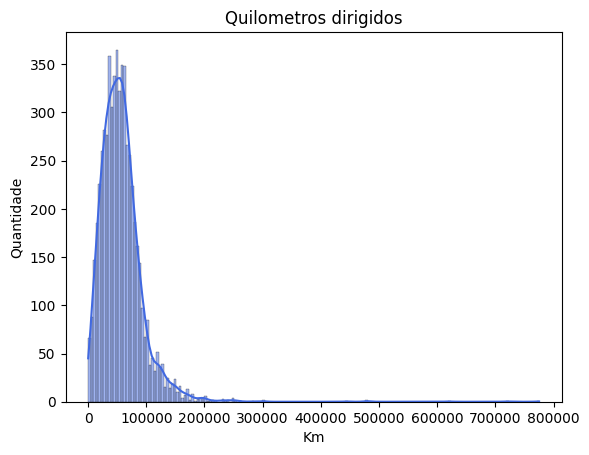

In [39]:
plt.title('Quilometros dirigidos')
sns.histplot(x='Kilometers_Driven',data=carro_usado[carro_usado['Kilometers_Driven']<np.max(carro_usado['Kilometers_Driven'])],
             color='royalblue',kde=True)
plt.xlabel('Km')
plt.ylabel('Quantidade')